# Importing the Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Collection and Processing
https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

In [31]:
gold_data = pd.read_csv('Dataset/goldprice.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [32]:
gold_data.tail() #last row of gold dataframe.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [33]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [34]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [46]:
gold_data = gold_data.drop(columns=['Date'])
gold_data.head()


,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [47]:
gold_data.shape

(2290, 5)

In [48]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [49]:
gold_data.isnull().sum() #checking for null values

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Correlation and Heatmap
**- Correlation**

Correlation measures the relationship between two variables, indicating how one variable changes in relation to another. In this dataset, correlation can help identify how different financial indicators (like the S&P 500 index, oil prices, etc.) are related to the price of gold (GLD). A positive correlation means that as one variable increases, the other tends to increase as well, while a negative correlation means that as one variable increases, the other tends to decrease.

**- Heatmap**

A heatmap is a graphical representation of data where individual values are represented by colors. In the context of this dataset, a heatmap can visualize the correlation matrix, making it easier to see the strength and direction of relationships between different financial indicators and the price of gold. Darker colors typically indicate stronger correlations, either positive or negative.

<Axes: >

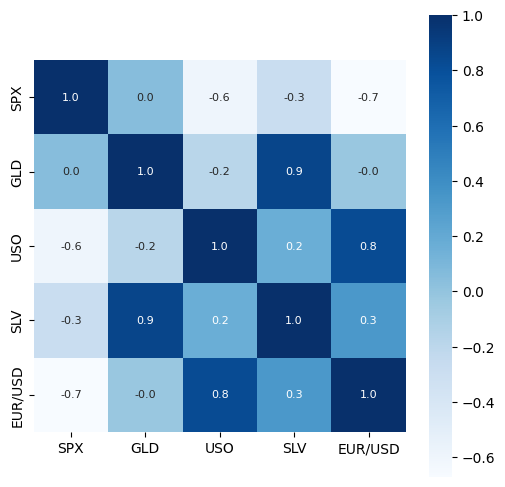

In [52]:
correlation = gold_data.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [53]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


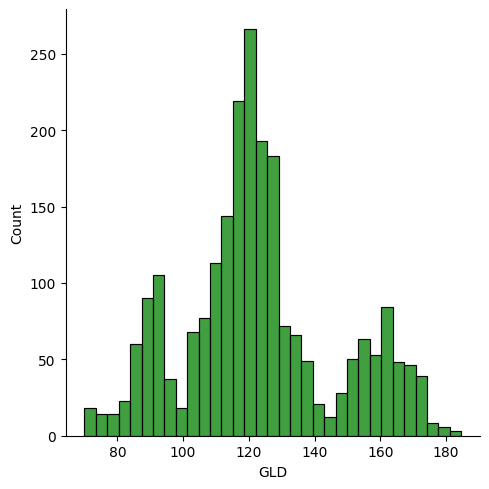

In [72]:
# checking the distribution of the GLD Price
sns.displot(gold_data['GLD'], color='green')

# Splitting the Features and Target

In [85]:
from sklearn.model_selection import train_test_split
X = gold_data.drop('GLD', axis=1)
y = gold_data['GLD']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Evaluation


**- R-squared (R²)**

R-squared is a statistical measure that indicates how well the independent variables explain the variability of the dependent variable. It ranges from 0 to 1, where:

- 0 means the model explains none of the variability.
- 1 means the model explains all the variability.

**-Mean Squared Error (MSE)**

Mean Squared Error is a metric that measures the average squared difference between the actual and predicted values. It indicates how close the predicted values are to the actual values, with lower values indicating better model performance.

# Random Forest
Random Forest is an ensemble learning method used for both regression and classification tasks. It operates by constructing multiple decision trees during training and outputting the average prediction (regression) or the majority vote (classification) of the individual trees. Here are the key points:

**- Ensemble Method:** Combines multiple decision trees to improve model accuracy and robustness.

**-Bootstrap Aggregation (Bagging):** Each tree is trained on a random subset of the data, which helps reduce overfitting.

**-Feature Randomness:** At each split in the tree, a random subset of features is considered, which enhances model diversity.

RandomForestRegressor(n_estimators=100) creates a random forest model with 100 decision trees to predict the target variable.

In [87]:
# training the model
from sklearn.linear_model import LinearRegression
regressor = RandomForestRegressor(n_estimators=100)

In [88]:
regressor.fit(x_train, y_train) #training the model
y_pred_train = regressor.predict(x_train) #predicting the values
mse = mean_squared_error(y_train, y_pred_train) #calculating the error
r2Score = r2_score(y_train, y_pred_train) #calculating the r2 score
print(f'Mean Squared Srror: {mse}')
print(f'R2 Score: {r2Score}')

Mean Squared Srror: 0.7281825350744685
R2 Score: 0.9986518390988138


In [89]:
y_train = list(y_train)

C:\Users\RASHIF02\AppData\Local\Temp\3\ipykernel_26440\2820184170.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


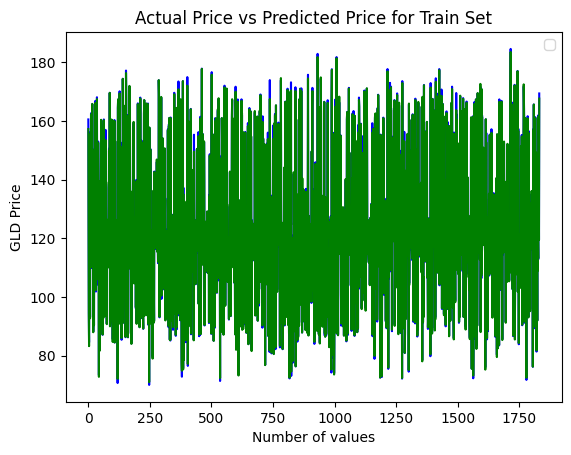

In [90]:
plt.plot(y_train, color = 'blue')
plt.plot(y_pred_train, color = 'green')
plt.title('Actual Price vs Predicted Price for Train Set')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [91]:
regressor.fit(x_test, y_test) #testing the model
y_pred_test = regressor.predict(x_test) #predicting the values
mse = mean_squared_error(y_test, y_pred_test) #calculating the error
r2Score = r2_score(y_test, y_pred_test) #calculating the r2 score
print(f'Mean Squared Srror: {mse}')
print(f'R2 Score: {r2Score}')

Mean Squared Srror: 1.7320488601942803
R2 Score: 0.9968410556451205


In [92]:
y_test = list(y_test)

C:\Users\RASHIF02\AppData\Local\Temp\3\ipykernel_26440\1287579451.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


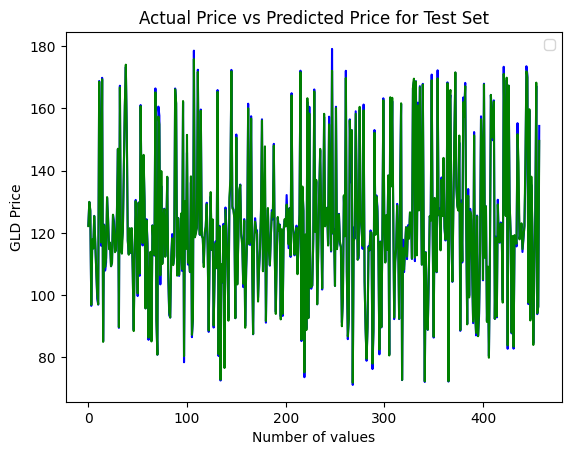

In [93]:
plt.plot(y_test, color = 'blue')
plt.plot(y_pred_test, color = 'green')
plt.title('Actual Price vs Predicted Price for Test Set')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()